In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as prep
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style='darkgrid')

In [2]:
df_segmentation = pd.read_csv('data/segmentation data.csv', index_col=0)
df_segmentation.columns = map(lambda x: x.lower().replace(' ', '_'), df_segmentation.columns)
df_segmentation.head()

,sex,marital_status,age,education,income,occupation,settlement_size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [3]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   sex              2000 non-null   int64
 1   marital_status   2000 non-null   int64
 2   age              2000 non-null   int64
 3   education        2000 non-null   int64
 4   income           2000 non-null   int64
 5   occupation       2000 non-null   int64
 6   settlement_size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [4]:
df_segmentation[['age', 'income']].describe()

,age,income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


In [5]:
df_segmentation.corr()

,sex,marital_status,age,education,income,occupation,settlement_size
sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
marital_status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
settlement_size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1.0, 'CORRELATION HEATMAP')

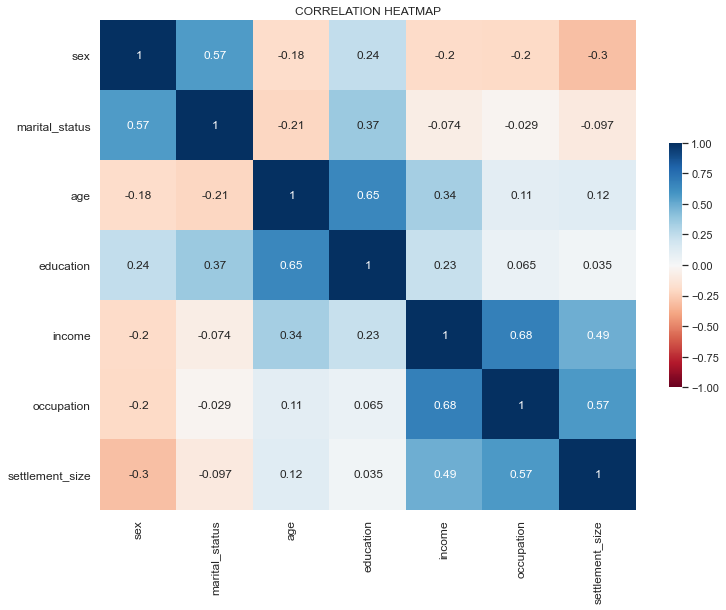

In [6]:
plt.figure(figsize=(12, 9))
cmap = sns.diverging_palette(10, 10, as_cmap=True)
fig = sns.heatmap(df_segmentation.corr(), annot=True, vmax=1, vmin=-1, cmap='RdBu', cbar_kws={"shrink": .5})
fig.set_xticklabels(fig.get_xticklabels(), rotation=90, fontsize=12)
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12, rotation=0)
plt.title('CORRELATION HEATMAP')

Text(0.5, 1.0, 'Scatter Plot of Age and Income')

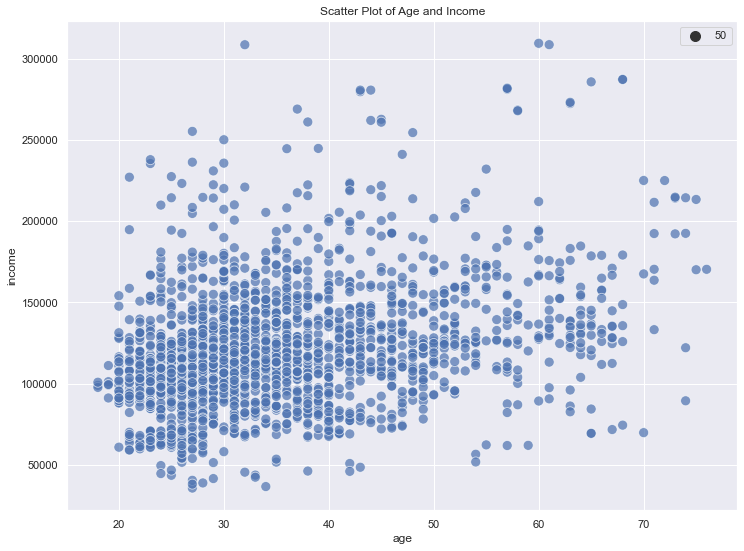

In [7]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x='age', y='income', data=df_segmentation, sizes=(100, 300), size=50, alpha=0.7)
plt.title('Scatter Plot of Age and Income')

In [8]:
df_segmentation.columns

Index(['sex', 'marital_status', 'age', 'education', 'income', 'occupation',
       'settlement_size'],
      dtype='object')

In [9]:
# sex = df_segmentation.sex.value_counts()
def barplot(col, df=df_segmentation):
    pct = round(df[col].value_counts() / len(df_segmentation[col]), 3)
    print(pct)
    sns.countplot(data=df, x=col)
    plt.title(f"Barplot of {col.replace('_', ' ')}")

0    0.543
1    0.457
Name: sex, dtype: float64


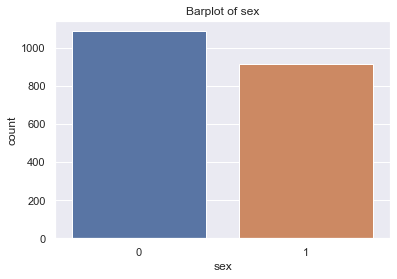

In [10]:
barplot('sex')

0    0.503
1    0.496
Name: marital_status, dtype: float64


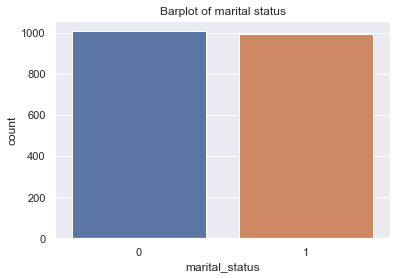

In [11]:
barplot('marital_status')

1    0.693
2    0.146
0    0.144
3    0.018
Name: education, dtype: float64


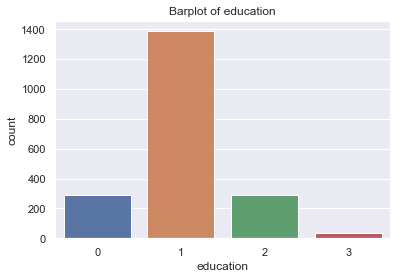

In [12]:
barplot('education')

1    0.556
0    0.316
2    0.127
Name: occupation, dtype: float64


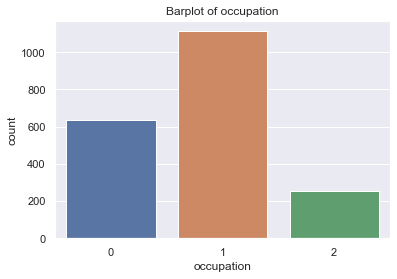

In [13]:
barplot('occupation')

0    0.494
1    0.272
2    0.234
Name: settlement_size, dtype: float64


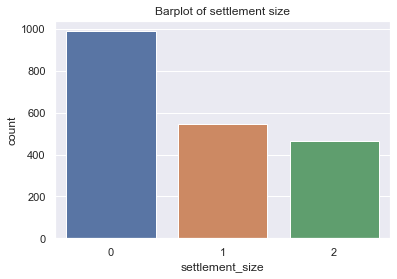

In [14]:
barplot('settlement_size')

In [15]:
df_segmentation.pivot_table(values='sex', columns=['education'], index=df_segmentation.sex, aggfunc='count')

education,0,1,2,3
sex,,,,
0,255,688,136,7
1,32,698,155,29


In [16]:
df_segmentation.pivot_table(values='sex', columns=['occupation'], index=df_segmentation.sex, aggfunc='count')

occupation,0,1,2
sex,,,
0,271,621,194
1,362,492,60


In [17]:
df_segmentation.pivot_table(values='sex', columns=['settlement_size'], index=df_segmentation.sex, aggfunc='count')

settlement_size,0,1,2
sex,,,
0,394,338,354
1,595,206,113


In [18]:
df_segmentation.pivot_table(values='sex', columns=['marital_status'], index=df_segmentation.sex, aggfunc='count')

marital_status,0,1
sex,,
0,829,257
1,178,736


Text(0.5, 1.0, 'Age Distribution')

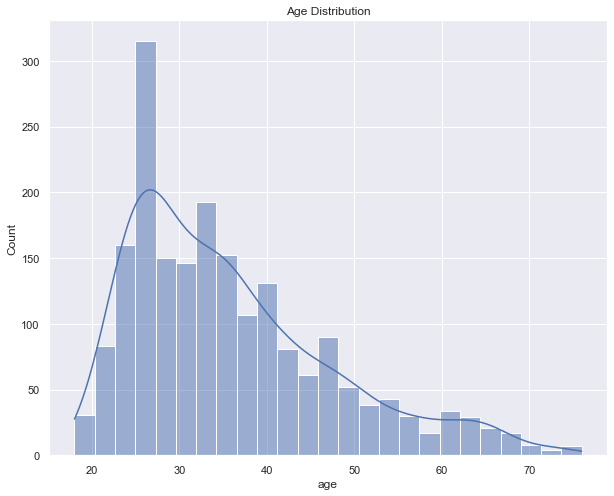

In [19]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df_segmentation, x='age', kde=True, bins='auto')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Income Distribution')

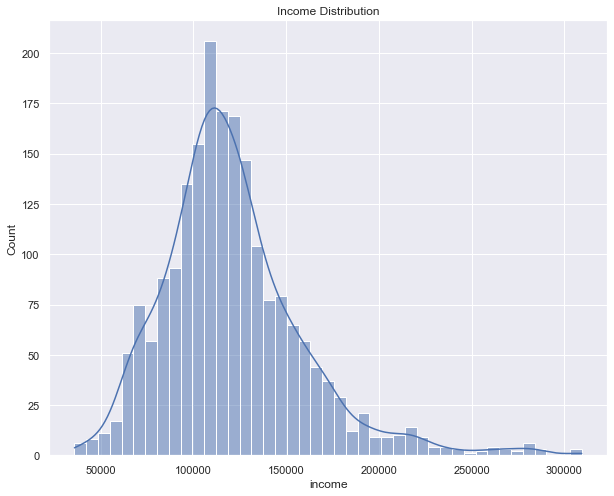

In [20]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df_segmentation, x='income', kde=True, bins='auto')
plt.title('Income Distribution')

<AxesSubplot:>

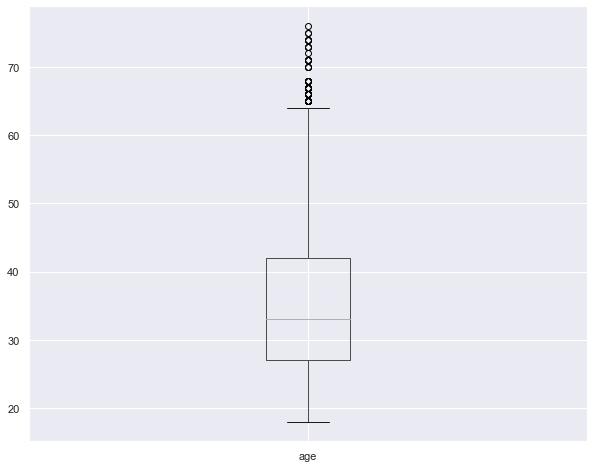

In [21]:
plt.figure(figsize=(10, 8))
df_segmentation.boxplot(column=['age'])

<AxesSubplot:>

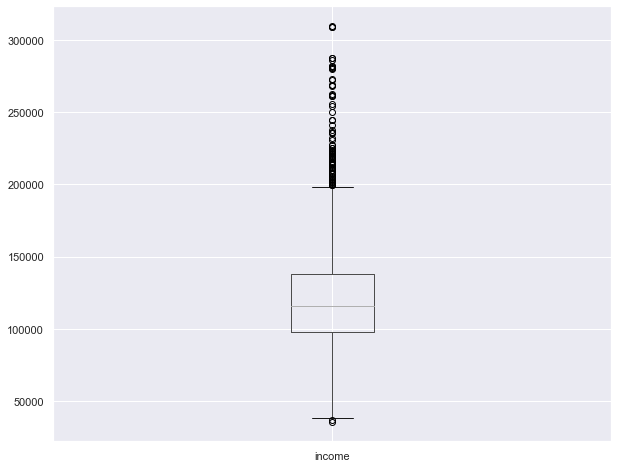

In [22]:
plt.figure(figsize=(10, 8))
df_segmentation.boxplot(column=['income'])

In [23]:
scaler = prep.StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [24]:
hier_clustering = linkage(segmentation_std, method='ward')

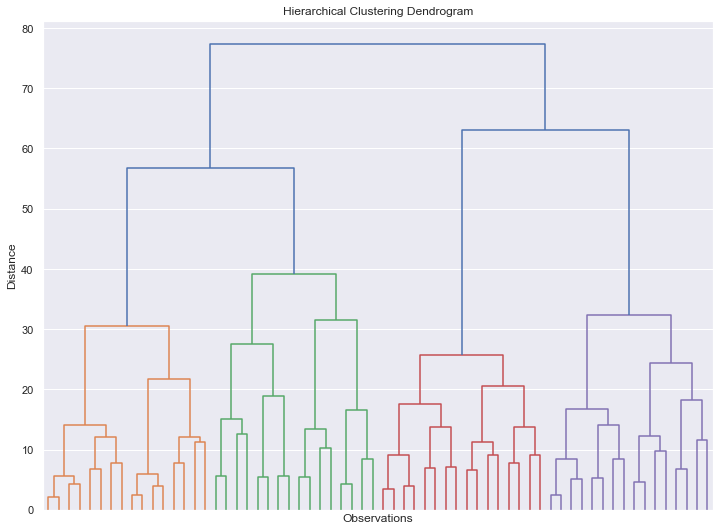

In [25]:
plt.figure(figsize=(12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clustering, show_leaf_counts=False, no_labels=True, truncate_mode='level', p=5);
# plt.show()

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-means Clustering')

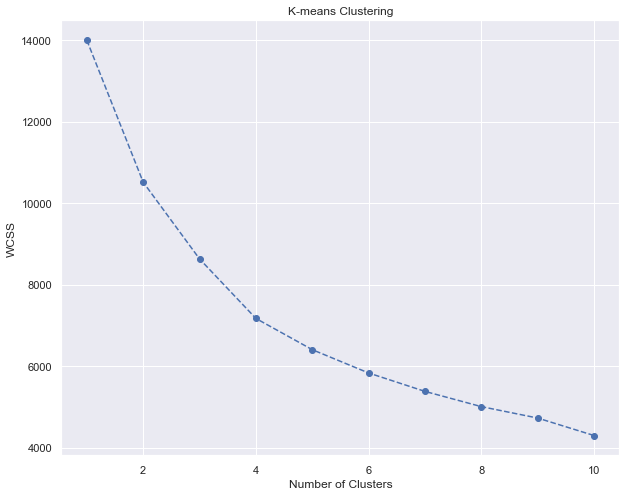

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [29]:
df_kmeans = df_segmentation.copy()
df_kmeans['segment_k_means'] = kmeans.labels_

In [30]:
df_kmeans_analysis = df_kmeans.groupby('segment_k_means').mean()
df_kmeans_analysis

,sex,marital_status,age,education,income,occupation,settlement_size
segment_k_means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [31]:
def kmeans_analysis(col=None):
    if col:
        return df_kmeans.groupby(['segment_k_means', col])
    return df_kmeans.groupby('segment_k_means')

In [32]:
df_kmeans_analysis['N Obs'] = df_kmeans[['segment_k_means', 'sex']].groupby('segment_k_means').count()

In [33]:
df_kmeans_analysis['Prop Obs'] = df_kmeans_analysis['N Obs'] / df_kmeans_analysis['N Obs'].sum()

In [34]:
df_kmeans_analysis.rename({
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career focused'
})

,sex,marital_status,age,education,income,occupation,settlement_size,N Obs,Prop Obs
segment_k_means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [35]:
df_kmeans.head()

,sex,marital_status,age,education,income,occupation,settlement_size,segment_k_means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


In [36]:
df_kmeans['labels'] = df_kmeans.segment_k_means.map({
                                                    0: 'well-off',
                                                    1: 'fewer-opportunities',
                                                    2: 'standard',
                                                    3: 'career focused'
                                                    })

Text(0.5, 1.0, 'Segmentation K-Means')

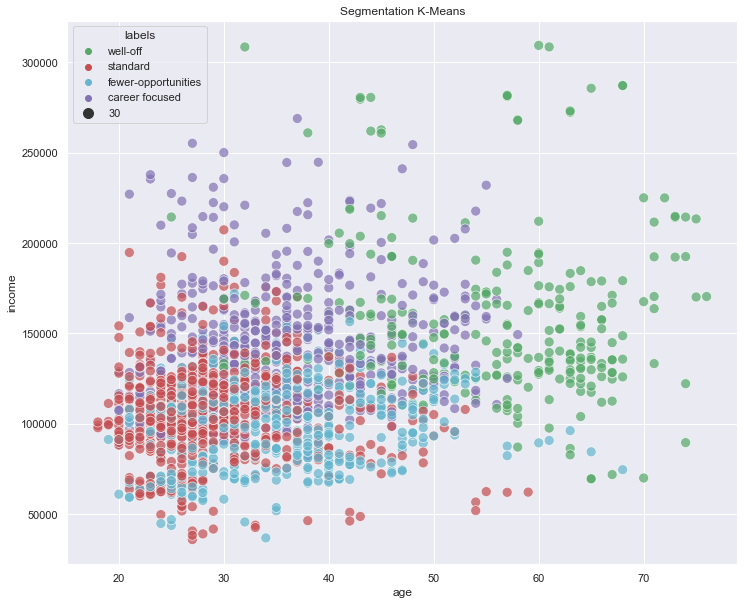

In [37]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_kmeans, x='age', y='income', hue='labels', palette=['g', 'r', 'c', 'm'], sizes=(100, 300), size=30, alpha=0.7)
plt.title('Segmentation K-Means')

In [38]:
pca = PCA()

In [39]:
pca.fit(segmentation_std)

PCA()